# TP Final de Aprendizaje Profundo

# 01-IMPORTACION DE BIBLIOTECAS

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
import numpy as np
from sklearn.model_selection import train_test_split
import time
from keras.utils import to_categorical


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.metrics import MSE
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from keras.layers import Activation


from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# 02-IMPORTACION SET DE IMAGENES

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

In [ ]:
# Utilizaremos solo imagenes de 7 personas con mas de 70 imagenes disponibles.
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.5, color=False, download_if_missing=True)

# Inspeccion de los tamaños
n_samples, h, w = lfw_people.images.shape

# Datos sin divir en subconjuntos
X = lfw_people.images

# Etiquetas y clases
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("h, w: (%d, %d)" % (h, w))
print("n_samples: %d" % n_samples)
print("n_classes: %d" % n_classes)

Total dataset size:
h, w: (62, 47)
n_samples: 1288
n_classes: 7


In [ ]:
# Algunas funciones para graficar
def plot_gallery(images, number, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(number):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y, target_names):
    return "%s" % (target_names[y])

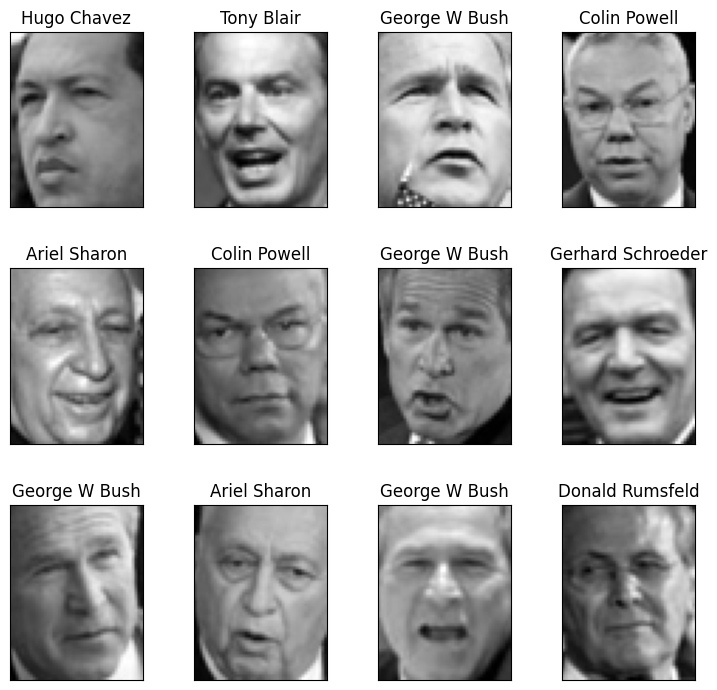

In [ ]:
titles = [title(y[i], target_names) for i in range(20)]
plot_gallery(X, 12 , titles, h, w)

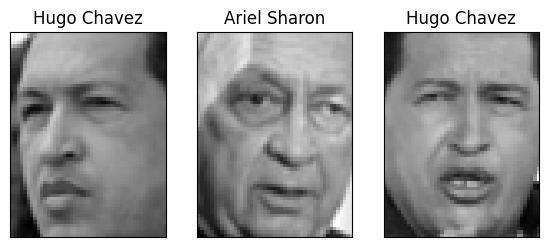

In [ ]:
titles = [title(y[i], target_names) for i in [0, 50, 1287]]
plot_gallery([X[0], X[50], X[1287]], 3, titles, h, w, n_row=1, n_col=3)

# 03-REDES DENSAS

## PREPARACION DE DATOS.

In [ ]:
X.shape

(1288, 62, 47)

In [ ]:
y.shape

(1288,)

In [ ]:
np.unique(y, return_counts=True) # Presencia de desbalance en target!

(array([0, 1, 2, 3, 4, 5, 6]), array([ 77, 236, 121, 530, 109,  71, 144]))

In [ ]:
# Hacemos division de trains y tests.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Ya estan normalizadas las variables predictoras.
print(X_train.max()) # Max
print(X_train.min()) # Min
print(X_train.mean())# Promedio
print(X[0])          # Obervamos celda 0 del array

1.0
0.0
0.50824714
[[0.9973857  0.9973857  0.99607843 ... 0.26928106 0.23267974 0.20261438]
 [0.9973857  0.99607843 0.99477124 ... 0.275817   0.24052288 0.20915033]
 [0.9882353  0.97647065 0.96732026 ... 0.26928106 0.24052288 0.21830066]
 ...
 [0.3372549  0.2784314  0.20522876 ... 0.4117647  0.39869282 0.37908497]
 [0.30980393 0.2522876  0.19738562 ... 0.39607847 0.39607844 0.37254906]
 [0.28496733 0.24705882 0.19869281 ... 0.38431373 0.3869281  0.3803922 ]]


In [ ]:
# Vectorizamos target.
print(y_train.shape) # Observamos target sin dummy
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes) #one-hot encoding
print(y_train.shape) # Observamos target con dummy

(1030,)
(1030, 7)


In [ ]:
# Transformamos foto plano a foto vector unidimensional
print(X_train.shape) # Observamos sin transformacion
X_train.shape = (X_train.shape[0], np.prod(X_train.shape[1:]))
X_test.shape = (X_test.shape[0], np.prod(X_test.shape[1:]))
print(X_train.shape) # Observamos con transformacion

(1030, 62, 47)
(1030, 2914)


## MODELO

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 2914)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 500)                 │       1,457,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1000)                │         501,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          50,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 7)                   │             357 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,514,507 (9.59 MB)

 Trainable params: 2,514,507 (9.59 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/48
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - acc: 0.3085 - loss: 1.9289 - val_acc: 0.4612 - val_loss: 1.5947
Epoch 2/48
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - acc: 0.3942 - loss: 1.7400 - val_acc: 0.4612 - val_loss: 1.6288
Epoch 3/48
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - acc: 0.4044 - loss: 1.6783 - val_acc: 0.4612 - val_loss: 1.9890
Epoch 4/48
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - acc: 0.3841 - loss: 1.7420 - val_acc: 0.3682 - val_loss: 1.6320
Epoch 5/48
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - acc: 0.4174 - loss: 1.6272 - val_acc: 0.4922 - val_loss: 1.5685
Epoch 6/48
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - acc: 0.4210 - loss: 1.6483 - val_acc: 0.5039 - val_loss: 1.3859
Epoch 7/48
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - acc: 0.4103 - loss: 1.7028 - val_acc: 0.5039 - val_loss: 1.3884
Epoch 8/48
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - acc: 0.4368 - loss: 1.5193 - val_acc: 0.5581 - val_loss: 1.2444
Epoch 9/48
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - acc: 0.46

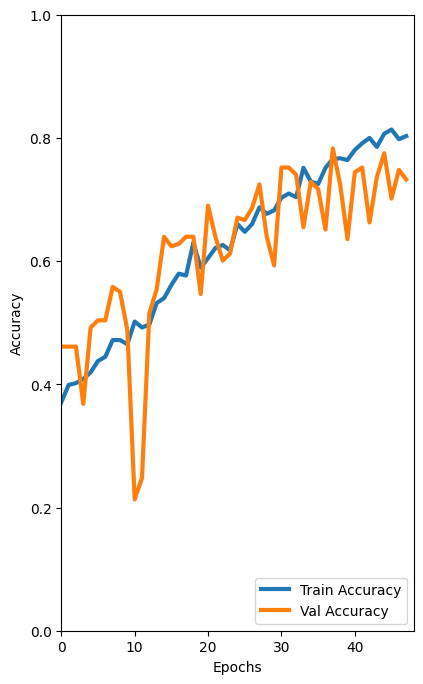

In [ ]:
# MODELO_1
#---------------------------------------------------------------------#
# Definimos parametros
lr = 1.0
epochs = 48
batch_size = 15
np.random.seed(14)

#---------------------------------------------------------------------#
# Definicion de capas y arquitectura.
input_layer = Input(shape=X_train.shape[1:])
dense_1 = Dense(500)(input_layer)
activation_1 = Activation('sigmoid')(dense_1)

dense_2 = Dense(1000)(activation_1)
activation_2 = Activation('tanh')(dense_2)

dense_3 = Dense(500)(activation_2)
activation_3 = Activation('relu')(dense_3)

dense_4 = Dense(100)(activation_3)
activation_4 = Activation('relu')(dense_4)

dense_5 = Dense(50)(activation_4)
activation_5 = Activation('elu')(dense_5)

output_layer = Dense(n_classes, activation='softmax')(activation_5)

model_1 = Model(input_layer, output_layer)

#---------------------------------------------------------------------#
#Copilacion
Adadelta_optimizer = Adadelta(learning_rate=lr, rho=0.95)
model_1.compile(optimizer=Adadelta_optimizer, loss='categorical_crossentropy', metrics=['acc'])
model_1.summary()

#---------------------------------------------------------------------#
#Evaluacion
history = model_1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), shuffle=True, verbose=1)

#---------------------------------------------------------------------#
# graficamos desarrollo de train y test del accuracy
f = plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.plot(history.history['acc'], linewidth=3, label='Train Accuracy')
plt.plot(history.history['val_acc'], linewidth=3, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.axis([0, len(history.history['acc']), 0, 1])  # Corregir el rango del eje x
plt.legend(loc='lower right')
plt.show()

## INTERPRETACION DE RESULTADOS

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


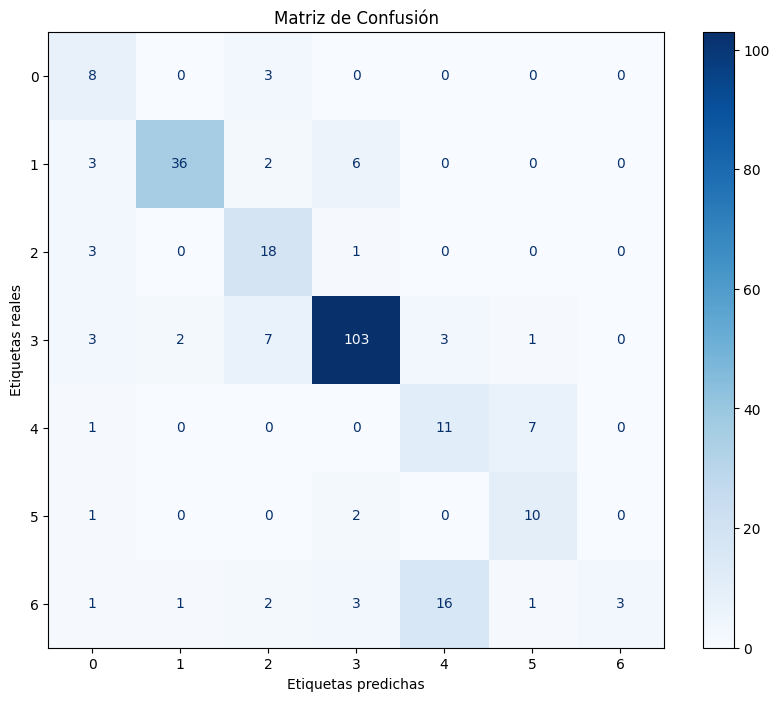

In [ ]:
# Modelo_1
# Obtener las predicciones para el conjunto de pruebas
y_pred = model_1.predict(X_test)

# Convertir las predicciones de codificación one-hot a etiquetas de clase
y_pred_clases = np.argmax(y_pred, axis=1)
y_true_clases = np.argmax(y_test, axis=1)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_true_clases, y_pred_clases)

# Crear el objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', ax=plt.gca())  # Usar ax=plt.gca() para que seaborn no cree una nueva figura
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión')
plt.show()

# 04-REDES CONVOLUCIONALES

## PREPARACION DE DATOS

In [ ]:
# Hacemos division de trains y tests.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Vectorizamos target.
print(y_train.shape) # Observamos target sin dummy
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes) #one-hot encoding
print(y_train.shape) # Observamos target con dummy

(1030,)
(1030, 7)


In [ ]:
X_train

array([[[0.26797387, 0.3137255 , 0.2901961 , ..., 0.23267974,
         0.15294118, 0.09019608],
        [0.26797387, 0.303268  , 0.26928106, ..., 0.21176471,
         0.19346406, 0.14771242],
        [0.28627452, 0.29803923, 0.26143792, ..., 0.20130719,
         0.19607843, 0.19607843],
        ...,
        [0.24444444, 0.24313726, 0.2496732 , ..., 0.8       ,
         0.73464054, 0.32418302],
        [0.25620916, 0.25882354, 0.25882354, ..., 0.8130719 ,
         0.4143791 , 0.05228758],
        [0.23921569, 0.23398693, 0.23267974, ..., 0.49281046,
         0.07058824, 0.00261438]],

       [[0.84444445, 0.8392157 , 0.8457516 , ..., 0.6666667 ,
         0.6470588 , 0.6418301 ],
        [0.84444445, 0.8457516 , 0.8496732 , ..., 0.6562092 ,
         0.6562092 , 0.6366013 ],
        [0.84052294, 0.848366  , 0.848366  , ..., 0.6666667 ,
         0.66274506, 0.6444444 ],
        ...,
        [0.16993465, 0.14509805, 0.11633987, ..., 0.5424836 ,
         0.54509807, 0.48104575],
        [0.2

In [ ]:
X_train = X_train.reshape(-1, 62, 47, 1) # Modificacino necesaria, debido a que son imagenes rectangulares.

## MODELO

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 62, 47, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 60, 45, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 8, 256)          │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6144)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6144)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 512)                 │       3,146,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,649,031 (13.92 MB)

 Trainable params: 3,649,031 (13.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 28s 378ms/step - acc: 0.3345 - loss: 1.8354 - val_acc: 0.4612 - val_loss: 1.5990
Epoch 2/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 31s 232ms/step - acc: 0.4110 - loss: 1.7102 - val_acc: 0.4612 - val_loss: 1.5488
Epoch 3/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 21s 238ms/step - acc: 0.3866 - loss: 1.6369 - val_acc: 0.5465 - val_loss: 1.3165
Epoch 4/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 22s 255ms/step - acc: 0.4864 - loss: 1.4445 - val_acc: 0.6008 - val_loss: 1.3232
Epoch 5/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 28s 361ms/step - acc: 0.5876 - loss: 1.1765 - val_acc: 0.7946 - val_loss: 0.7426
Epoch 6/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 34s 255ms/step - acc: 0.7522 - loss: 0.8095 - val_acc: 0.7248 - val_loss: 0.9222
Epoch 7/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 235ms/step - acc: 0.7830 - loss: 0.6131 - val_acc: 0.8101 - val_loss: 0.6363
Epoch 8/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 26s 320ms/step - acc: 0.8585 - loss: 0.3974 - val_acc: 0.7713 - val_loss: 0.7165
Epoch 9/15
69/69 ━━━━━━━━━━━━━━━━━━━━ 39s 298ms/

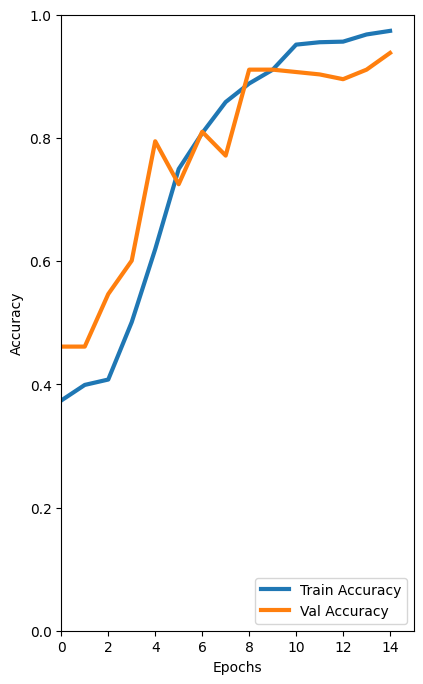

In [ ]:
# MODELO_2
#---------------------------------------------------------------------#
# Definimos parametros
lr = 1.0
epochs = 15
batch_size = 15
np.random.seed(14)

#---------------------------------------------------------------------#

input_layer = Input(shape=X_train.shape[1:])
conv_1 = Conv2D(64, (3, 3), activation='tanh')(input_layer)
pool_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(128, (3, 3), activation='relu')(pool_1)
pool_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(256, (3, 3), activation='relu')(pool_2)
pool_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(512, (3, 3), activation='sigmoid')(pool_3)
flatten = Flatten()(pool_3)
dropout_1 = Dropout(0.5)(flatten)
dense_1 = Dense(512, activation='tanh')(dropout_1)
dropout_2 = Dropout(0.5)(dense_1)
dense_2 = Dense(256, activation='relu')(dropout_2)
output_layer = Dense(n_classes, activation='softmax')(dense_2)
model_2 = Model(input_layer, output_layer)
#---------------------------------------------------------------------#
#Copilacion
Adadelta_optimizer = Adadelta(learning_rate=lr, rho=0.95)
model_2.compile(optimizer=Adadelta_optimizer, loss='categorical_crossentropy', metrics=['acc'])
model_2.summary()

#---------------------------------------------------------------------#
#Evaluacion
history = model_2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), shuffle=True, verbose=1)

#---------------------------------------------------------------------#
# graficamos desarrollo de train y test del accuracy
f = plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.plot(history.history['acc'], linewidth=3, label='Train Accuracy')
plt.plot(history.history['val_acc'], linewidth=3, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.axis([0, len(history.history['acc']), 0, 1])  # Corregir el rango del eje x
plt.legend(loc='lower right')
plt.show()

##INTERPRETACION DE RESULTADOS

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


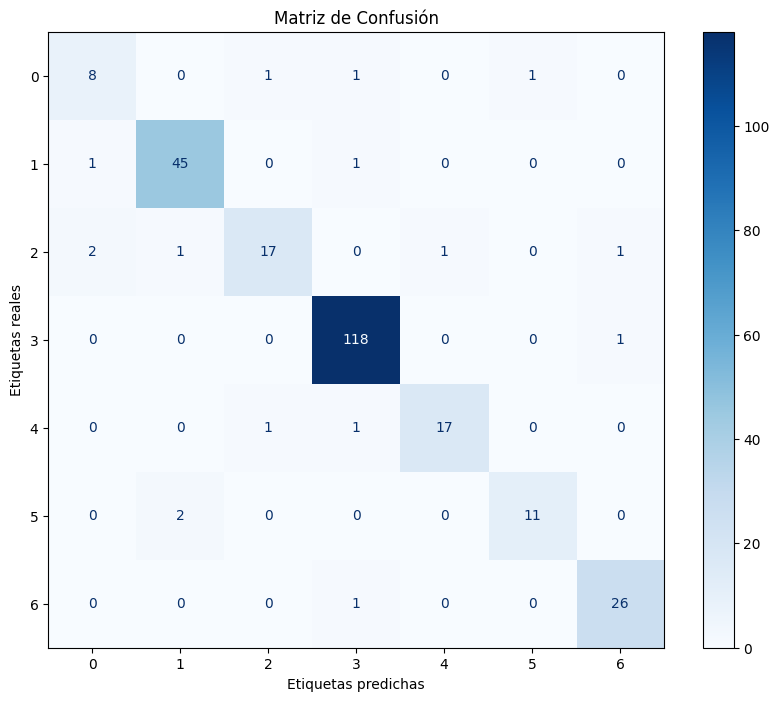

In [ ]:
# Modelo_2
# Obtener las predicciones para el conjunto de pruebas
y_pred = model_2.predict(X_test)

# Convertir las predicciones de codificación one-hot a etiquetas de clase
y_pred_clases = np.argmax(y_pred, axis=1)
y_true_clases = np.argmax(y_test, axis=1)

# Calcular la matriz de confusión
matriz_confusion = confusion_matrix(y_true_clases, y_pred_clases)

# Crear el objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', ax=plt.gca())  # Usar ax=plt.gca() para que seaborn no cree una nueva figura
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de Confusión')
plt.show()

# 05-CONCLUSIONES

Como pudimos observar en el modelo ganador, es le que corresponde al de REDES CONVOLUCIONALES.
No solo por los tiempos de entrenamientos reducidos que conlleva este, si no tambien, es el que mejor balance  de matriz de confuncion tiene.